In [1]:
#Step 1: Import relevant packages
import sklearn
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__,tf.__version__)

4.1.2 2.6.0


There are 70000 pictures in the entire dataset.
The size of each image is 28 x 28
There are 10 types of class in the dataset,  which are written as [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


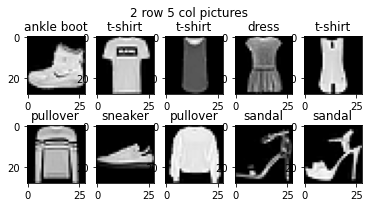

In [25]:
#Step 2: Load the Fashion-MNIST dataset
fashion_MNIST = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test_all,y_test_all) = fashion_MNIST.load_data()

#Q1: Check how many images and labels are there in the entire dataset
print('There are',x_train_all.shape[0]+x_test_all.shape[0],'pictures in the entire dataset.')

#Q2: What is the size of each image
print('The size of each image is',x_train_all.shape[1],'x',x_train_all.shape[2])

#Q3: Check how many classes there are. 
#(Already know there are 10 kinds，represented as 0,1,2,3...)
def Check_Class(y_train_all):
  class_type = []
  for i in y_train_all:
    if i not in class_type:
      class_type.append(i)
  class_type = sorted(class_type)
  print('There are', len(class_type),'types of class in the dataset,\
  which are written as',class_type)
Check_Class(y_train_all)

#Q4: Display some images of each label 
#confused by how to arrange these pictures by labels
#only refer to the tensorflow tutorial to display them according to their positions in the database.
def Display_Some(n_row,n_col,x_data,y_data,class_names):
  try:
    title = str(n_row)+' row '+str(n_col)+' col pictures'
    plt.figure(figsize=(n_col*1.2,n_row*1.5))
    plt.suptitle(title)
    for i in range(n_row):
      for j in range(n_col):
        #the location of the current picture
        index = n_col*i+j
        plt.subplot(n_row,n_col,index+1)
        plt.imshow(cv2.cvtColor(x_data[index],cv2.COLOR_BGR2RGB))
        plt.title(class_names[y_data[index]])
    plt.show()
  except ValueError:
    print('The total number of pictures is out of the boundary or the input data does not have the same length.')     
class_names=['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
Display_Some(2,5,x_train_all,y_train_all,class_names)

In [26]:
#Step 3: Take a subset of the data set
#if it is a complete datatest, instead of picking the last 2000, 
#picking randomly by train_test_split()
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
x_train = x_train_all[:2000]
y_train = y_train_all[:2000]
x_test = x_test_all[:500]
y_test = y_test_all[:500]
if x_train.shape[0]==y_train.shape[0] and x_test.shape[0]==y_test.shape[0]:
  print('There are',x_train.shape[0],'pictures in training set.')
  print('There are',x_test.shape[0],'pictures in testing set.')

There are 2000 pictures in training set.
There are 500 pictures in testing set.


In [27]:
#Step 4: Perform necessary reshaping of the data for the classifiers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True)
#first fit the data, then transform it
#for KNN, no 3-D, have to be 2-D
x_train = scaler.fit_transform(x_train.reshape(-1,1)).reshape(-1,28*28)
#do not need to fit, because we have already found the sigma and mean value,
#can apply to training test derectly
x_test = scaler.transform(x_test.reshape(-1,1)).reshape(-1,28*28)
print('KNN:',x_train.shape,x_test.shape)

KNN: (2000, 784) (500, 784)


**Classification**

              precision    recall  f1-score   support

     t-shirt       0.77      0.84      0.80        55
     trouser       0.93      0.98      0.95        52
    pullover       0.61      0.66      0.64        65
       dress       0.80      0.80      0.80        46
        coat       0.70      0.54      0.61        57
      sandal       0.94      0.85      0.89        39
       shirt       0.49      0.53      0.51        47
     sneaker       0.90      0.91      0.91        47
         bag       1.00      0.93      0.96        44
  ankle boot       0.92      0.96      0.94        48

    accuracy                           0.79       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.80      0.79      0.79       500



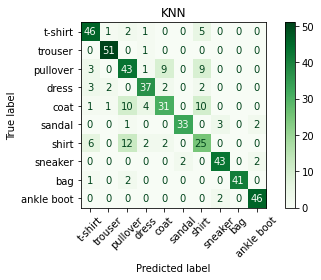

In [28]:
#KNN with k=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Step 5: Initialise the classifier model
def KNN_classifier():
  knn = KNeighborsClassifier(n_neighbors=3)

  #Step 6: Fit the model to the training data
  knn.fit(x_train, y_train)

  #Step 7: Use the trained/fitted model to evaluate the test data
  y_predict=knn.predict(x_test)

  #Step 8: Reporting performance of each classifier
  #Q1:accuracy, precision, recall, and the F1-score 
  class_names=['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  print(classification_report(y_test, y_predict, target_names=class_names))

  #Q2:confusion matrix  
  cm = confusion_matrix(y_pred=y_predict, y_true=y_test)
  cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)
  cmp.plot(cmap=plt.cm.Greens,xticks_rotation=45)
  plt.title('KNN')
  plt.tight_layout()

#runs so fast on colab, only 3s, cool
KNN_classifier()

Find the best parameters of KNN with GridSearch from neighbors = 1 to 20

In [29]:
  knn = KNeighborsClassifier()
  #GridSearchCV allows us to define a grid of parameters that will be searched using K-fold cross-validation
  #model is knn, labels from 0 to 9,10-fold cross validation,computations in parallel
  #cannot use roc_auc_score, for it is now quantitative rather than qualitative
  #However, in the lab we are supposed to test KNN with k=3...
  k_range = list(range(1, 21))
  param_grid = dict(n_neighbors=k_range)
  grid_KNN = GridSearchCV(knn, param_grid,cv = 10,n_jobs=-1,scoring='accuracy')
  grid_KNN.fit(x_train, y_train)
  # Single best score achieved across all params (k)
  print('From neightbors = 1 to 20, the best accuracy score is',grid_KNN.best_score_)
  #Best neightbor
  print('Guess it is works better when',grid_KNN.best_params_)
  #Best model
  print('The best model is',grid_KNN.best_estimator_)

From neightbors = 1 to 20, the best accuracy score is 0.7955000000000001
Guess it is works better when {'n_neighbors': 6}
The best model is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


              precision    recall  f1-score   support

     t-shirt       0.85      0.80      0.82        55
     trouser       0.91      0.92      0.91        52
    pullover       0.56      0.51      0.53        65
       dress       0.64      0.76      0.69        46
        coat       0.58      0.49      0.53        57
      sandal       0.82      0.85      0.84        39
       shirt       0.41      0.47      0.44        47
     sneaker       0.83      0.94      0.88        47
         bag       0.90      0.80      0.84        44
  ankle boot       0.85      0.83      0.84        48

    accuracy                           0.72       500
   macro avg       0.73      0.74      0.73       500
weighted avg       0.73      0.72      0.72       500



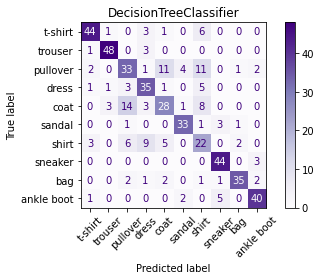

In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier
def DT_Classifier():
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)
  y_predict = tree.predict(x_test)

  #Q1:accuracy, precision, recall, and the F1-score
  print(classification_report(y_test, y_predict, target_names=class_names))
  #Q2:confusion matrix  
  cm = confusion_matrix(y_pred=y_predict, y_true=y_test)
  cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)
  cmp.plot(cmap=plt.cm.Purples,xticks_rotation=45)
  plt.title('DecisionTreeClassifier')
  plt.tight_layout()
DT_Classifier()

              precision    recall  f1-score   support

     t-shirt       0.92      0.80      0.85        55
     trouser       0.98      0.96      0.97        52
    pullover       0.66      0.66      0.66        65
       dress       0.73      0.80      0.76        46
        coat       0.73      0.70      0.71        57
      sandal       0.91      1.00      0.95        39
       shirt       0.52      0.60      0.55        47
     sneaker       0.86      0.94      0.90        47
         bag       0.97      0.89      0.93        44
  ankle boot       0.98      0.85      0.91        48

    accuracy                           0.81       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.82      0.81      0.81       500



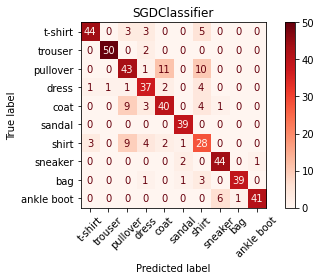

In [ ]:
#SDG with max_iter = 250
from sklearn.linear_model import SGDClassifier
def SDG_classifier():
  sdg =SGDClassifier(max_iter = 250)
  sdg.fit(x_train, y_train)
  y_predict = sdg.predict(x_test)
  #Q1:accuracy, precision, recall, and the F1-score
  print(classification_report(y_test, y_predict, target_names=class_names))
  #Q2:confusion matrix  
  cm = confusion_matrix(y_pred=y_predict, y_true=y_test)
  cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)
  cmp.plot(cmap=plt.cm.Reds,xticks_rotation=45)
  plt.title('SGDClassifier')
  plt.tight_layout()
SDG_classifier()

Using the three classifiers KNN (k = 3), DT, SGD (max_iter = 250), SGD has the highest accuracy 0.81, while DT has the lowest accuracy 0.72. So we recommand use SGD to classify these 500 pictures.
And among these 10 classes, 'trouser','t-shirt'and 'sneaker' have fewer prediction errors, while 'shirt' and 'coat' have more.